In [1]:
# Import necessary models
import pyspark
import pyspark.sql as pyspark_sql
import pyspark.sql.functions as pyspark_functions
from pyspark import SparkConf


In [2]:
# Creating spark instance
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = pyspark_sql.SparkSession.builder.getOrCreate()

In [3]:
# Reading the dataset
kan_data = spark.read.csv("Datasets/kan_output.csv", header=None, inferSchema=True)
# Data Schema
kan_data.printSchema()
# Basic overview of the dataset
kan_data.show()

root
 |-- _c0: double (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: date (nullable = true)
 |-- _c3: date (nullable = true)
+--------------------+------------+----------+----------+
|                 _c0|         _c1|       _c2|       _c3|
+--------------------+------------+----------+----------+
|1.760713459877335...|Kandy Proper|2019-01-01|2019-01-02|
|9.220391253917748E-5|Kandy Proper|2019-01-02|2019-01-03|
|                null|Kandy Proper|2019-01-03|2019-01-04|
|1.908681983853839...|Kandy Proper|2019-01-04|2019-01-05|
|1.219517840206744...|Kandy Proper|2019-01-05|2019-01-06|
|-6.51408612938880...|Kandy Proper|2019-01-06|2019-01-07|
|  1.6323820639265E-4|Kandy Proper|2019-01-07|2019-01-08|
|-6.73520553391426...|Kandy Proper|2019-01-08|2019-01-09|
|1.279693658243135...|Kandy Proper|2019-01-09|2019-01-10|
|4.546048424126012E-5|Kandy Proper|2019-01-10|2019-01-11|
|3.600074175192105E-5|Kandy Proper|2019-01-11|2019-01-12|
|1.286629698010177E-4|Kandy Proper|2019-01-12|2

In [4]:
# Define the new column names
column_names = ['HCHO Reading', 'Location', 'Current Date', 'Next Date']

# Rename the columns
for item, col_name in enumerate(column_names):
    kan_data = kan_data.withColumnRenamed(kan_data.columns[item], col_name)
# Dataset with column names
kan_data.show()
# Finding the null values
# Checking the sum of the Null values
kan_data.select(*[pyspark_functions.sum(pyspark_functions.col(c).isNull().cast("int")).alias(c) for c in
                          kan_data.columns]).show()


+--------------------+------------+------------+----------+
|        HCHO Reading|    Location|Current Date| Next Date|
+--------------------+------------+------------+----------+
|1.760713459877335...|Kandy Proper|  2019-01-01|2019-01-02|
|9.220391253917748E-5|Kandy Proper|  2019-01-02|2019-01-03|
|                null|Kandy Proper|  2019-01-03|2019-01-04|
|1.908681983853839...|Kandy Proper|  2019-01-04|2019-01-05|
|1.219517840206744...|Kandy Proper|  2019-01-05|2019-01-06|
|-6.51408612938880...|Kandy Proper|  2019-01-06|2019-01-07|
|  1.6323820639265E-4|Kandy Proper|  2019-01-07|2019-01-08|
|-6.73520553391426...|Kandy Proper|  2019-01-08|2019-01-09|
|1.279693658243135...|Kandy Proper|  2019-01-09|2019-01-10|
|4.546048424126012E-5|Kandy Proper|  2019-01-10|2019-01-11|
|3.600074175192105E-5|Kandy Proper|  2019-01-11|2019-01-12|
|1.286629698010177E-4|Kandy Proper|  2019-01-12|2019-01-13|
|                null|Kandy Proper|  2019-01-13|2019-01-14|
|                null|Kandy Proper|  201

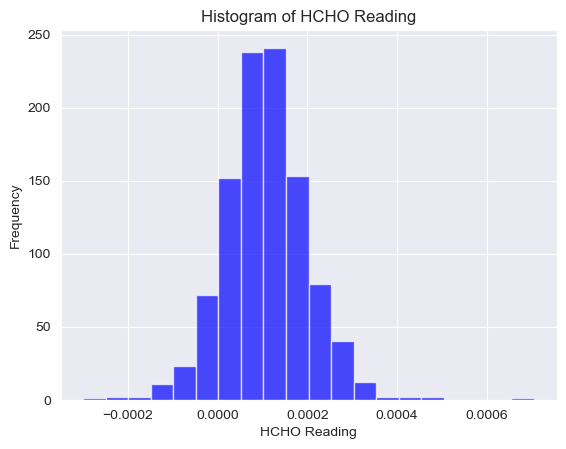

In [5]:
import matplotlib.pyplot as plt

# Convert the Spark DataFrame to Pandas DataFrame for plotting
pandas_df = kan_data.toPandas()

# Plotting histogram for 'HCHO Reading' column
plt.hist(pandas_df['HCHO Reading'], bins=20, color='blue', alpha=0.7)
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.title('Histogram of HCHO Reading')
plt.grid(True)
plt.show()

In [8]:
# Calculate the mean of 'HCHO Reading' column
hcho_mean = kan_data.select(pyspark_functions.mean('HCHO Reading')).collect()[0][0]

# Replace null values in 'HCHO Reading' column with the calculated mean
kan_data_imputed = kan_data.withColumn('HCHO Reading',
                                                       pyspark_functions.when(kan_data['HCHO Reading'].isNull(),
                                                                              hcho_mean).otherwise(
                                                           kan_data['HCHO Reading']))
# Show the DataFrame with null values replaced by mean value in 'HCHO Reading' column
kan_data_imputed.show()

+--------------------+------------+------------+----------+
|        HCHO Reading|    Location|Current Date| Next Date|
+--------------------+------------+------------+----------+
|1.760713459877335...|Kandy Proper|  2019-01-01|2019-01-02|
|9.220391253917748E-5|Kandy Proper|  2019-01-02|2019-01-03|
|1.063760956208845...|Kandy Proper|  2019-01-03|2019-01-04|
|1.908681983853839...|Kandy Proper|  2019-01-04|2019-01-05|
|1.219517840206744...|Kandy Proper|  2019-01-05|2019-01-06|
|-6.51408612938880...|Kandy Proper|  2019-01-06|2019-01-07|
|  1.6323820639265E-4|Kandy Proper|  2019-01-07|2019-01-08|
|-6.73520553391426...|Kandy Proper|  2019-01-08|2019-01-09|
|1.279693658243135...|Kandy Proper|  2019-01-09|2019-01-10|
|4.546048424126012E-5|Kandy Proper|  2019-01-10|2019-01-11|
|3.600074175192105E-5|Kandy Proper|  2019-01-11|2019-01-12|
|1.286629698010177E-4|Kandy Proper|  2019-01-12|2019-01-13|
|1.063760956208845...|Kandy Proper|  2019-01-13|2019-01-14|
|1.063760956208845...|Kandy Proper|  201

In [9]:
# Check if there are any null values left
kan_data_imputed.select(*[pyspark_functions.sum(pyspark_functions.col(c).isNull().cast("int")).alias(c) for c in
                                  kan_data_imputed.columns]).show()


+------------+--------+------------+---------+
|HCHO Reading|Location|Current Date|Next Date|
+------------+--------+------------+---------+
|           0|       0|           0|        0|
+------------+--------+------------+---------+


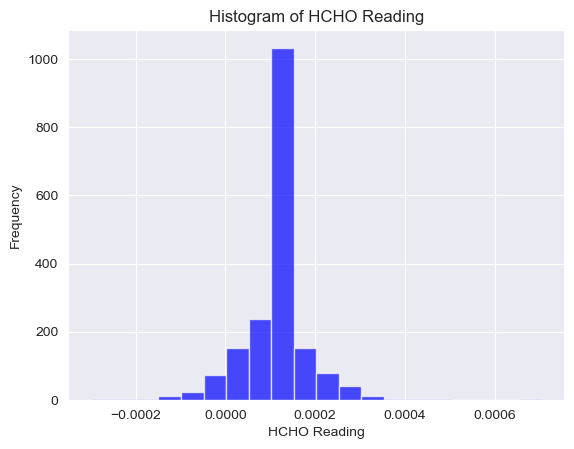

In [10]:
import matplotlib.pyplot as plt

# Convert the DataFrame to Pandas DataFrame for plotting
pandas_df = kan_data_imputed.toPandas()

# Plotting histogram for 'HCHO Reading' column
plt.hist(pandas_df['HCHO Reading'], bins=20, color='blue', alpha=0.7)
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.title('Histogram of HCHO Reading')
plt.grid(True)
plt.show()

In [11]:
# Remove duplicates
col_mat_nuw_data_no_duplicates = kan_data_imputed.dropDuplicates()

# Show the DataFrame without duplicates
col_mat_nuw_data_no_duplicates.show()

+--------------------+------------+------------+----------+
|        HCHO Reading|    Location|Current Date| Next Date|
+--------------------+------------+------------+----------+
|1.760713459877335...|Kandy Proper|  2019-01-01|2019-01-02|
|1.063760956208845...|Kandy Proper|  2019-05-22|2019-05-23|
|1.063760956208845...|Kandy Proper|  2019-08-13|2019-08-14|
|2.208422988999331E-5|Kandy Proper|  2020-01-07|2020-01-08|
|6.611775819286781E-5|Kandy Proper|  2020-01-19|2020-01-20|
|1.063760956208845...|Kandy Proper|  2021-07-15|2021-07-16|
|1.063760956208845...|Kandy Proper|  2021-08-06|2021-08-07|
|1.426577047210533...|Kandy Proper|  2022-01-15|2022-01-16|
|1.042020127392362...|Kandy Proper|  2022-02-27|2022-02-28|
|1.063760956208845...|Kandy Proper|  2022-10-06|2022-10-07|
|1.339018031976543E-4|Kandy Proper|  2022-10-29|2022-10-30|
|2.160144270600257E-4|Kandy Proper|  2023-03-21|2023-03-22|
|7.816291169118864E-5|Kandy Proper|  2023-06-10|2023-06-11|
|1.063760956208845...|Kandy Proper|  201

In [12]:
# Loop through each column
for col_name in kan_data_imputed.columns:
    # Select the column and get distinct values
    unique_values = kan_data_imputed.select(col_name).distinct()
    # Convert the result to a list and print
    unique_values_list = [row[col_name] for row in unique_values.collect()]
    print(f"Unique values in column '{col_name}':")
    for value in unique_values_list:
        print(value)
    print()

Unique values in column 'HCHO Reading':
0.00017072664496364963
0.00010834018276325684
0.00013139883069290657
-0.00015064561192641227
5.429734714904007e-05
-2.9737522183390376e-05
3.10034295700588e-05
4.462642397080864e-05
1.4610784981298888e-05
0.00014895250116080978
0.00016470563546318404
0.00011041436837677451
8.172313194602926e-06
0.00010913621615386512
-1.0934480164319894e-05
0.00013437648979610443
0.00016055575462064976
-7.823375594718562e-05
5.630749428469005e-05
0.00010420201273923621
5.989757943210389e-05
0.00010508686418477404
0.0002367085434052842
-5.8307068595810777e-05
0.00021412388979293525
0.00024357429984340944
0.000299052413346186
0.00012322416140905088
0.00010115208682023648
2.7064110826008873e-05
-2.3368440293625812e-05
5.939434894998055e-05
1.569671117488859e-07
7.985907723195851e-05
0.00015760587144122667
0.0001275124704156308
6.099527672631667e-05
8.228346580453299e-05
-5.460778700422602e-05
6.499407942693201e-05
0.00016783292730509195
0.00012517846587659304
0.0001

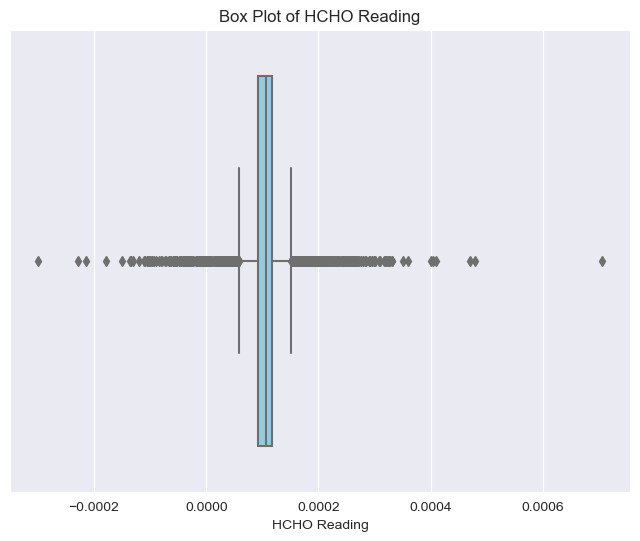

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame for plotting
pandas_df = kan_data_imputed.select('HCHO Reading').toPandas()

# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=pandas_df['HCHO Reading'], color='skyblue')
plt.title('Box Plot of HCHO Reading')
plt.xlabel('HCHO Reading')
plt.show()

In [14]:
from pyspark.sql.functions import col

# Filter out rows with 'HCHO Reading' above 0.0008
col_mat_nuw_data_filtered = kan_data_imputed.filter(col('HCHO Reading') <= 0.0006)

# Show the DataFrame after removing outliers
col_mat_nuw_data_filtered.show()

+--------------------+------------+------------+----------+
|        HCHO Reading|    Location|Current Date| Next Date|
+--------------------+------------+------------+----------+
|1.760713459877335...|Kandy Proper|  2019-01-01|2019-01-02|
|9.220391253917748E-5|Kandy Proper|  2019-01-02|2019-01-03|
|1.063760956208845...|Kandy Proper|  2019-01-03|2019-01-04|
|1.908681983853839...|Kandy Proper|  2019-01-04|2019-01-05|
|1.219517840206744...|Kandy Proper|  2019-01-05|2019-01-06|
|-6.51408612938880...|Kandy Proper|  2019-01-06|2019-01-07|
|  1.6323820639265E-4|Kandy Proper|  2019-01-07|2019-01-08|
|-6.73520553391426...|Kandy Proper|  2019-01-08|2019-01-09|
|1.279693658243135...|Kandy Proper|  2019-01-09|2019-01-10|
|4.546048424126012E-5|Kandy Proper|  2019-01-10|2019-01-11|
|3.600074175192105E-5|Kandy Proper|  2019-01-11|2019-01-12|
|1.286629698010177E-4|Kandy Proper|  2019-01-12|2019-01-13|
|1.063760956208845...|Kandy Proper|  2019-01-13|2019-01-14|
|1.063760956208845...|Kandy Proper|  201

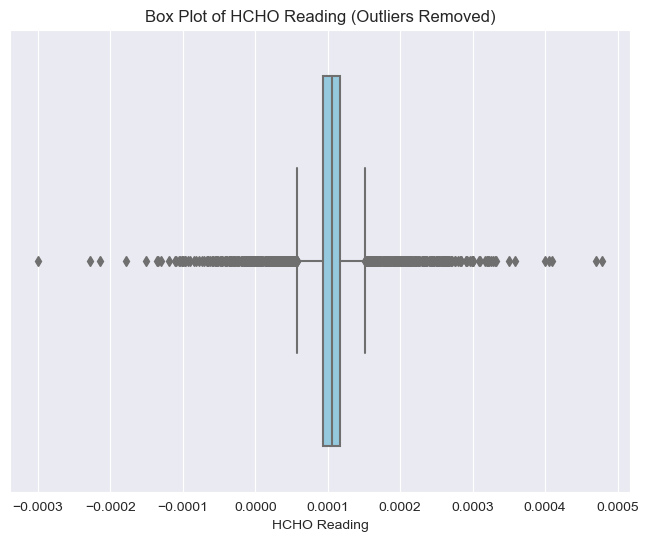

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the filtered Spark DataFrame to Pandas DataFrame for plotting
pandas_df_filtered = col_mat_nuw_data_filtered.select('HCHO Reading').toPandas()

# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=pandas_df_filtered['HCHO Reading'], color='skyblue')
plt.title('Box Plot of HCHO Reading (Outliers Removed)')
plt.xlabel('HCHO Reading')
plt.show()